In [37]:
%matplotlib inline
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import pylab
from scipy import stats
from scipy.stats import skew
from scipy.stats import boxcox
from copy import deepcopy

In [2]:
print('Loading data ...')
cols=[u'train_id', u'name', u'item_condition_id', u'category_name',
       u'brand_name', u'price', u'shipping', u'item_description']
df = pd.read_csv('/Users/zhwei/MachineLearnning/kaggle/mercari/train.tsv', sep='\t')
#tdf=pd.read_csv("/Users/zhwei/share/lixianglan/gitrepo/kaggle/digitRecognizer/test.csv")
# print df['item_condition_id'].value_counts()
# print df['brand_name'].value_counts()
#df.plot(kind="scatter", x="item_condition_id", y="price")
#df.plot(kind="scatter", x="shipping", y="price")
#sns.jointplot(x="item_condition_id",y="price",data=df,size=20)



Loading data ...


In [12]:
df.count()

train_id             1482535
name                 1482535
item_condition_id    1482535
category_name        1476208
brand_name            849853
price                1482535
shipping             1482535
item_description     1482531
dtype: int64

In [7]:
df.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


array([[<matplotlib.axes.AxesSubplot object at 0x10c131190>,
        <matplotlib.axes.AxesSubplot object at 0x1129dd490>]], dtype=object)

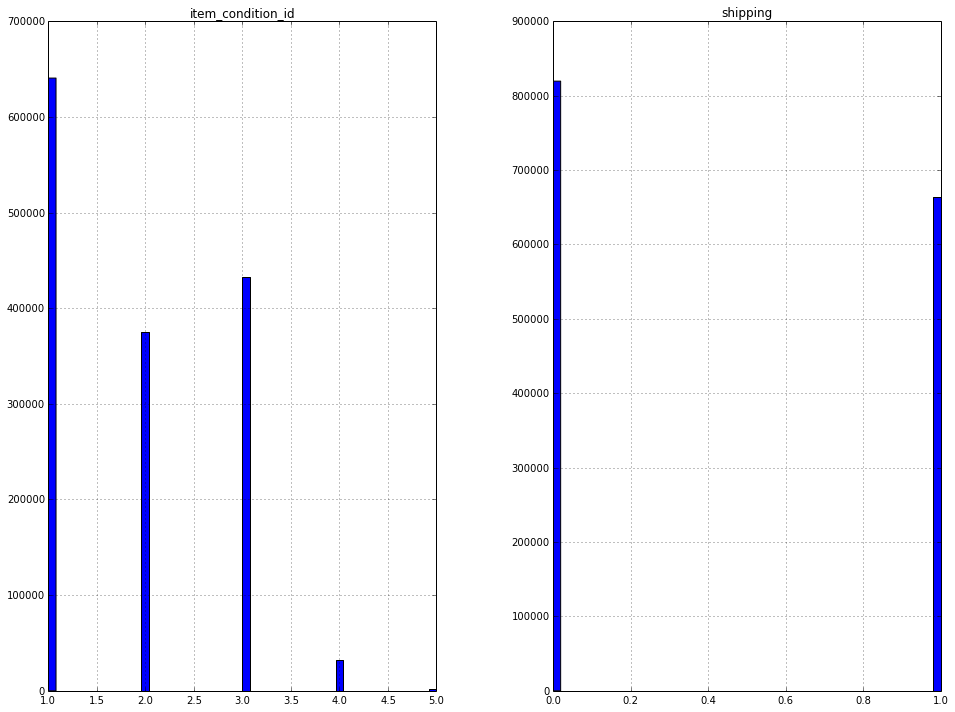

In [4]:
ncols=['item_condition_id','shipping']
df[ncols].hist(bins=50, figsize=(16, 12))

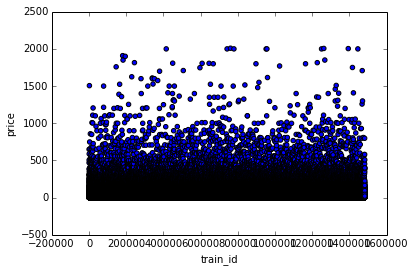

In [7]:
df.plot(kind='scatter',x='train_id',y='price')

In [11]:
ori_skewness = stats.mstats.skew(df['price']).data
log_skewness = stats.mstats.skew(np.log(df['price'])).data
print ori_skewness
print log_skewness

11.3932204726
0


/Library/Python/2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


/Library/Python/2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


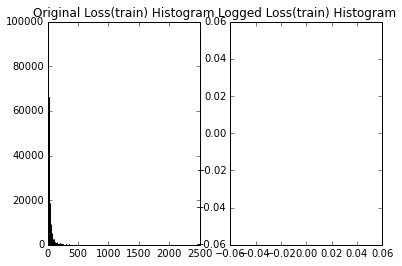

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(df['price'],bins=2000)
ax1.set_title("Original Loss(train) Histogram")
ax2.hist(np.log(df['price']),bins=2000)
ax2.set_title("Logged Loss(train) Histogram")

In [24]:
df[ncols].corr()

,item_condition_id,shipping
item_condition_id,1.000000,-0.191154
shipping,-0.191154,1.000000


In [58]:
first=df.loc[df['price']<=10.0]
scond=df.loc[(df['price']<=17.0) & (df['price']>10.0) ]
third=df.loc[(df['price']<=29.0) & (df['price']>17.0)]
four=df.loc[df['price']>29.0]

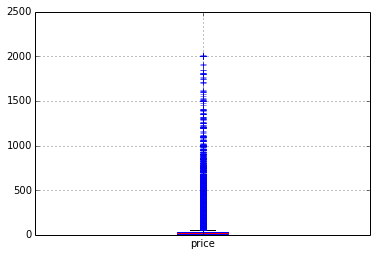

In [32]:
df[['price']].boxplot()

In [43]:

def math_transform(df, feature):
    ''' This function tests log1p & sqrt transformation and compare the differences.'''
    
    print 'Feature: ', feature
    

    plt.figure()
    plt.suptitle("Feature - {}".format(feature))
    
    # Log1p transformation.    
    plt.subplot(321)
    _ = plt.hist(np.log1p(df[feature]), bins=50)
    text_x_pos = plt.xlim()[1]-(np.abs(plt.xlim()[1]-plt.xlim()[0])*0.25)    
    _ = plt.text(text_x_pos, plt.ylim()[1]*0.8, "Skewness: {0:0.2f}".format(skew(np.log1p(df[feature]))))
    _ = plt.title("Log1P")
    plt.subplot(322)
    _ = plt.boxplot(np.log1p(df[feature]))

    # Sqrt transformation.
    plt.subplot(323)
    _ = plt.hist(np.sqrt(df[feature]), bins=50)
    _ = plt.title("SQRT")
    text_x_pos = plt.xlim()[1]-(np.abs(plt.xlim()[1]-plt.xlim()[0])*0.25)   
    _ = plt.text(text_x_pos, plt.ylim()[1]*0.8, "Skewness: {0:0.2f}".format(skew(np.sqrt(df[feature]))))
    plt.subplot(324)
    _ = plt.boxplot(np.sqrt(df[feature]))
    
    # Boxcox transformation.
    plt.subplot(325)
    _ = plt.hist(boxcox(df[feature]+1)[0], bins=50)
    _ = plt.title("Boxcox")
    text_x_pos = plt.xlim()[1]-(np.abs(plt.xlim()[1]-plt.xlim()[0])*0.25)
    _ = plt.text(text_x_pos, plt.ylim()[1]*0.8, "Skewness: {0:0.2f}".format(skew(boxcox(df[feature]+1)[0])))
    plt.subplot(326)
    _ = plt.boxplot(boxcox(df[feature]+1)[0])

    print "Skewness of log1p: ", skew(np.log1p(df[feature]))
    print "Skewness of sqrt: ", skew(np.sqrt(df[feature]))
    print "Skewness of boxcox: ", skew(boxcox(df[feature]+1)[0])
    print "\n"

Feature:  price
Skewness of log1p:  0.659422534664
Skewness of sqrt:  2.84421994343
Skewness of boxcox:  -0.0287288574606




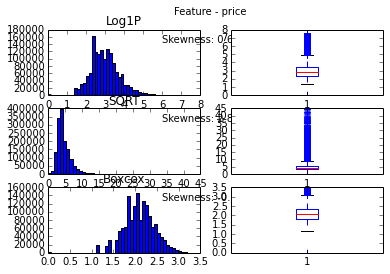

In [44]:
math_transform(df,'price')